In [31]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [34]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
df.drop(["CustomerID"],axis=1, inplace=True)

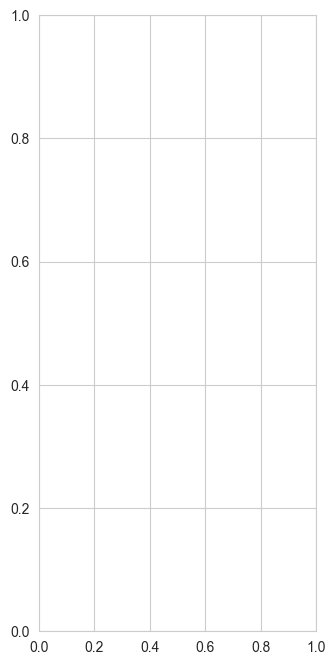

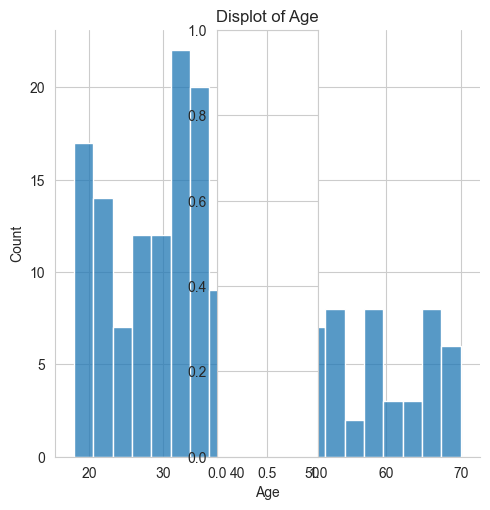

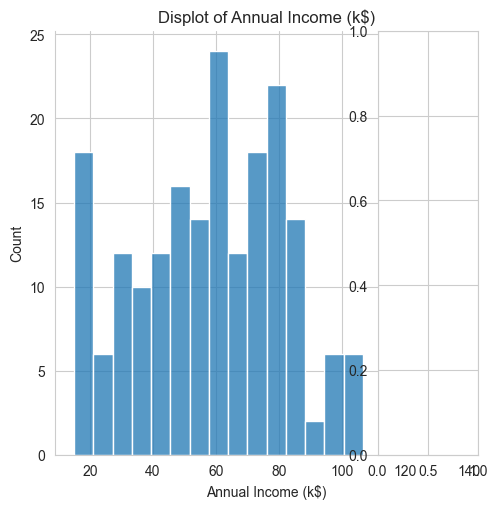

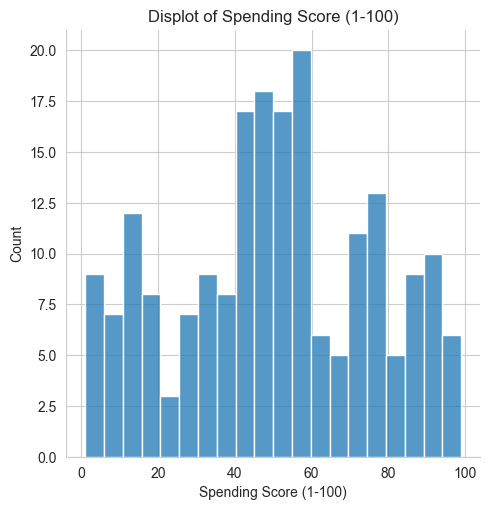

In [38]:
plt.figure(figsize=(15,8))
n=0
for x in['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1 ,3 ,n)
    plt.subplots_adjust(hspace=0.6 ,wspace=0.6)
    sns.displot(df[x] ,bins=20)
    plt.title('Displot of {}'.format(x))
plt.show() 

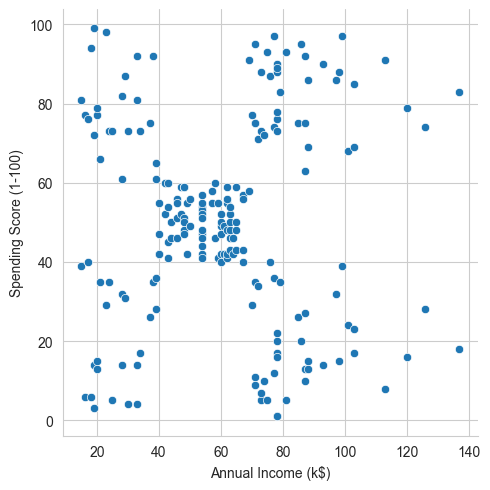

In [39]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

C:\Users\hemam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hemam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hemam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hemam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

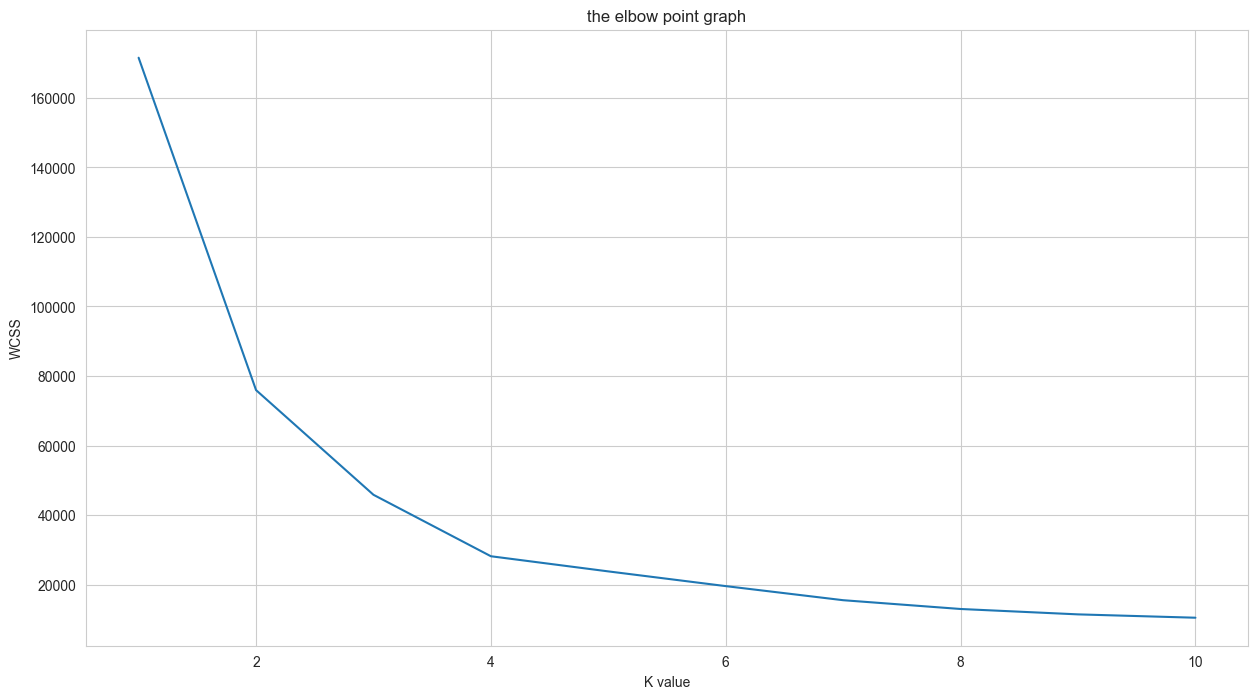

In [56]:
x1=df.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
WCSS=[]
for k in range(1,11):
    Kmeans = KMeans(n_clusters=k,init="k-means++",random_state=2)
    Kmeans.fit(x1)
    WCSS.append(Kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.title("the elbow point graph")
plt.plot(range(1,11),WCSS)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [57]:
Kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=Kmeans.fit_predict(x1)

C:\Users\hemam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
Kmeans.cluster_centers_

array([[60.36666667, 51.16666667],
       [43.1       , 12.2       ],
       [30.1754386 , 82.35087719],
       [25.775     , 50.775     ],
       [44.96969697, 39.15151515]])

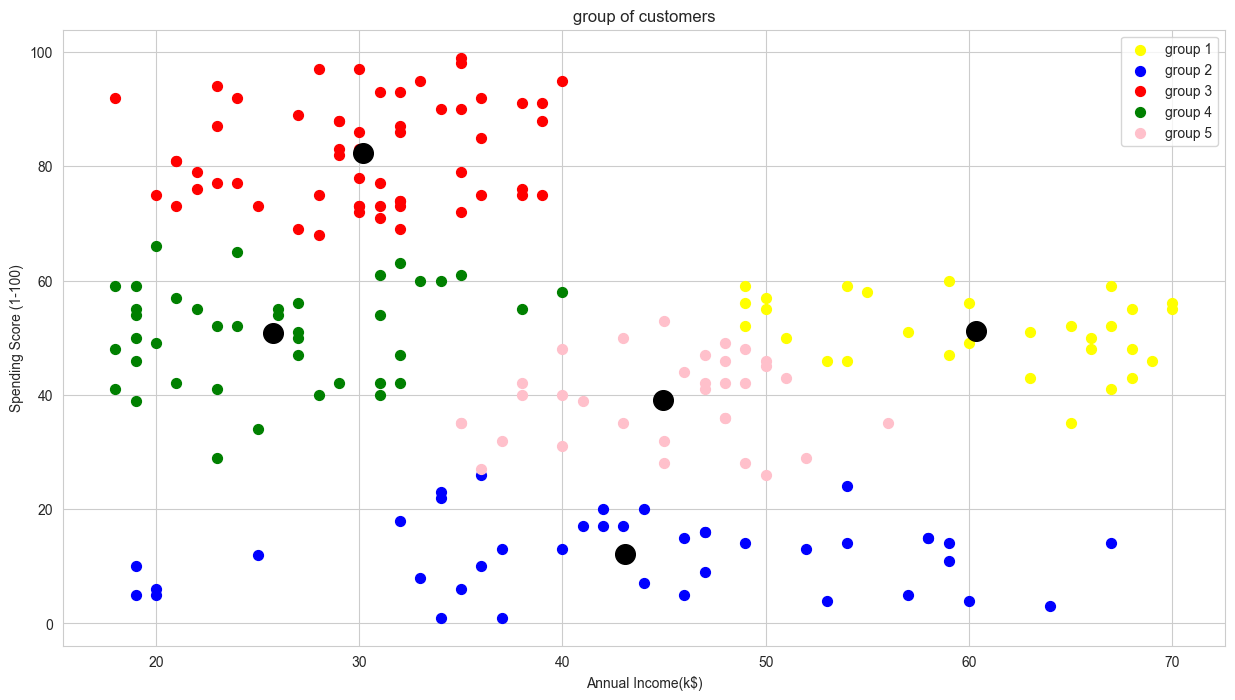

In [63]:

plt.figure(figsize=(15,8))
plt.scatter(x1[y ==0, 0],x1[y ==0, 1], s=50,c="yellow", label="group 1")
plt.scatter(x1[y ==1, 0],x1[y ==1, 1], s=50,c="blue", label="group 2")
plt.scatter(x1[y ==2, 0],x1[y ==2, 1], s=50,c="red", label="group 3")
plt.scatter(x1[y ==3, 0],x1[y ==3, 1], s=50,c="green", label="group 4")
plt.scatter(x1[y ==4, 0],x1[y ==4, 1], s=50,c="pink", label="group 5")
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=200,c="black")
plt.title("group of customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()